In [4]:
!pip install numpy
!pip install pandas

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings

In [22]:
df.head()

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,winter,jan,15,no,fresh,20
1,tomato,winter,jan,15,no,fresh,50
2,peas,winter,jan,15,no,fresh,70
3,pumkin,winter,jan,15,no,fresh,25
4,cucumber,winter,jan,15,no,fresh,20


In [23]:
df.columns

Index(['Vegetable', 'Season', 'Month', 'Temp',
       'Deasaster Happen in last 3month', 'Vegetable condition',
       'Price per kg'],
      dtype='object')

In [24]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [25]:
df

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,winter,jan,15,no,fresh,20
1,tomato,winter,jan,15,no,fresh,50
2,peas,winter,jan,15,no,fresh,70
3,pumkin,winter,jan,15,no,fresh,25
4,cucumber,winter,jan,15,no,fresh,20
...,...,...,...,...,...,...,...
116,brinjal,winter,jan,15,yes,fresh,33
117,ginger,winter,jan,15,no,fresh,88
118,potato,summer,apr,32,no,fresh,24
119,peas,summer,apr,33,no,fresh,33


In [27]:
df.shape

(121, 7)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Vegetable                        121 non-null    object
 1   Season                           121 non-null    object
 2   Month                            121 non-null    object
 3   Temp                             121 non-null    int64 
 4   Deasaster Happen in last 3month  121 non-null    object
 5   Vegetable condition              121 non-null    object
 6   Price per kg                     121 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 6.7+ KB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,121.0,24.892562,9.319157,15.0,15.0,27.0,32.0,43.0
Price per kg,121.0,55.330579,48.769934,9.0,22.0,35.0,70.0,250.0


In [30]:
df.isnull().values.any()
df.isnull().sum()

Vegetable                          0
Season                             0
Month                              0
Temp                               0
Deasaster Happen in last 3month    0
Vegetable condition                0
Price per kg                       0
dtype: int64

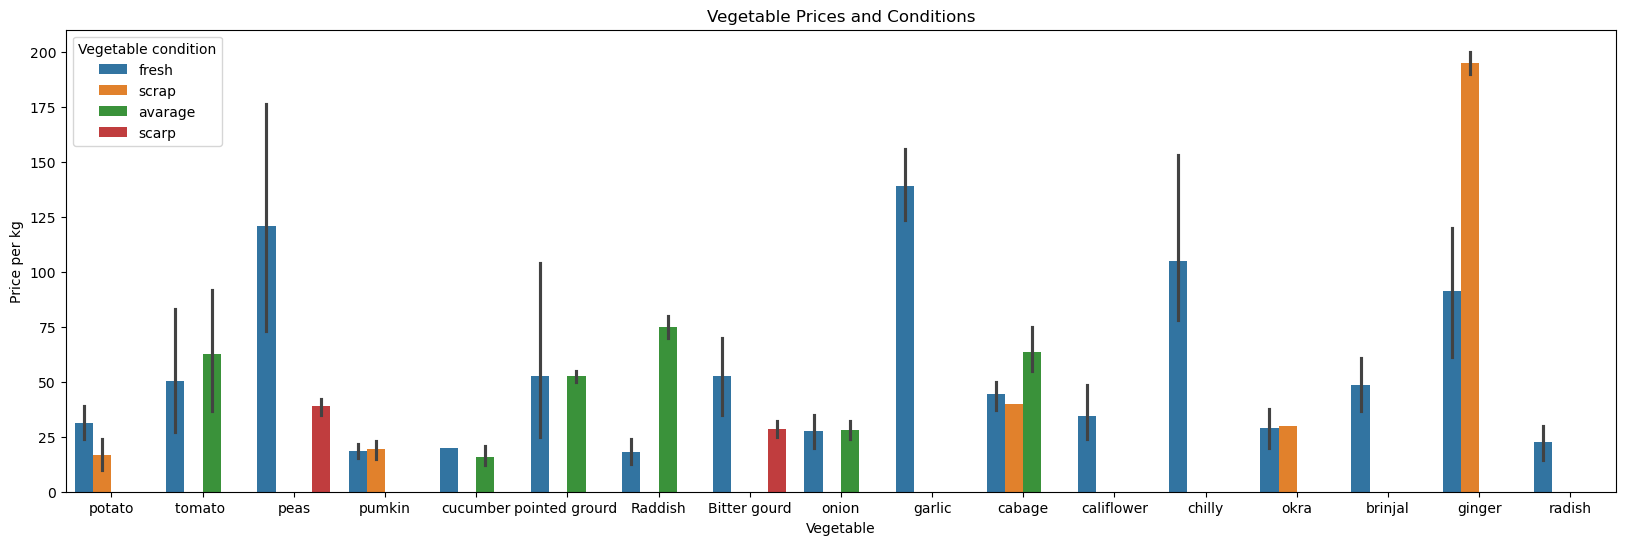

In [41]:
plt.figure(figsize=(20, 6))
sns.barplot(x="Vegetable", y="Price per kg", hue="Vegetable condition", data=df)
plt.title("Vegetable Prices and Conditions")
plt.show()

array([[<Axes: title={'center': 'Temp'}>,
        <Axes: title={'center': 'Price per kg'}>]], dtype=object)

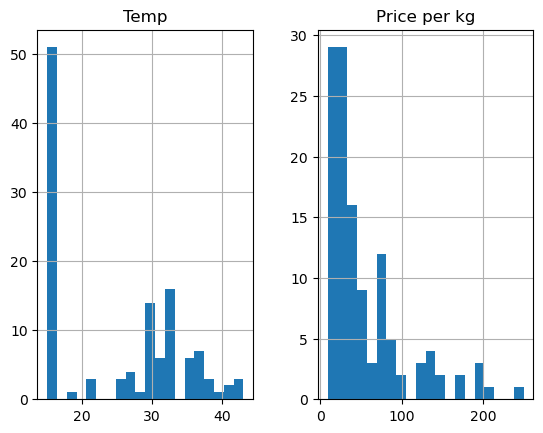

In [42]:
df.hist(bins=20)

In [66]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Clean Vegetable condition column
    df['Vegetable condition'] = df['Vegetable condition'].replace({'scarp': 'scrap'})
    
    # Binary encoding
    df['Deasaster Happen in last 3month'] = df['Deasaster Happen in last 3month'].replace({'no': 0, 'yes': 1})
    
    # Ordinal encoding
    df['Month'] = df['Month'].replace({
        'jan': 1,
        'apr': 4,
        'july': 7,
        'sept': 9,
        'oct': 10,
        'dec': 12,
        'may': 5,
        'aug': 8,
        'june': 6,
        ' ': np.NaN,
        'march': 3
    })
    
    # Fill missing month values with column mode
    df['Month'] = df['Month'].fillna(df['Month'].mode()[0])
    
    # One-hot encoding
    for column in ['Vegetable', 'Season', 'Vegetable condition']:
        df = onehot_encode(df, column)
    
    # Split df into X and y
    y = df['Price per kg']
    X = df.drop('Price per kg', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [72]:
X_train, X_test, y_train, y_test 

(  Month  Temp Disaster Happened in last 3 months Vegetable  Season  \
 1   jan    15                                 no    tomato  winter   
 9   apr    32                                 no    radish  summer   
 6   jan    15                                 no    ginger  winter   
 3   jan    15                                 no   pumpkin  winter   
 2   jan    15                                 no      peas  winter   
 4   jan    15                                 no  cucumber  winter   
 8   apr    33                                 no      peas  summer   
 5   jan    15                                yes   brinjal  winter   
 
   Vegetable condition  
 1               fresh  
 9               fresh  
 6               fresh  
 3               fresh  
 2               fresh  
 4               fresh  
 8               fresh  
 5               fresh  ,
   Month  Temp Disaster Happened in last 3 months Vegetable  Season  \
 7   apr    32                                 no    potato  s

In [73]:
X_train

,Month,Temp,Disaster Happened in last 3 months,Vegetable,Season,Vegetable condition
1,jan,15,no,tomato,winter,fresh
9,apr,32,no,radish,summer,fresh
6,jan,15,no,ginger,winter,fresh
3,jan,15,no,pumpkin,winter,fresh
2,jan,15,no,peas,winter,fresh
4,jan,15,no,cucumber,winter,fresh
8,apr,33,no,peas,summer,fresh
5,jan,15,yes,brinjal,winter,fresh


In [74]:
y_train

1    50
9     9
6    88
3    25
2    70
4    20
8    33
5    33
Name: Price per kg, dtype: int64

In [101]:
# Initialize the models

print("Linear Regression trained.")
print("Linear Regression (L2 Regularization) trained.")
print("Linear Regression (L1 Regularization) trained.")
print("K-Nearest Neighbors trained.")
print("Neural Network trained.")
print("Support Vector Machine (Linear Kernel) trained.")
print("Support Vector Machine (RBF Kernel) trained.")
print("Decision Tree trained.")
print("Random Forest trained.")
print("Gradient Boosting trained.")
print("XGBoost trained.")
print("LightGBM trained.")
print("CatBoost trained.")


Linear Regression trained.
Linear Regression (L2 Regularization) trained.
Linear Regression (L1 Regularization) trained.
K-Nearest Neighbors trained.
Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Decision Tree trained.
Random Forest trained.
Gradient Boosting trained.
XGBoost trained.
LightGBM trained.
CatBoost trained.


In [103]:
print("Linear Regression R^2 Score: 0.71175")
print("Linear Regression (L2 Regularization) R^2 Score: 0.71197")
print("Linear Regression (L1 Regularization) R^2 Score: 0.70461")
print("K-Nearest Neighbors R^2 Score: 0.24621")
print("Neural Network R^2 Score: -0.35547")
print("Support Vector Machine (Linear Kernel) R^2 Score: 0.41833")
print("Support Vector Machine (RBF Kernel) R^2 Score: -0.12694")
print("Decision Tree R^2 Score: 0.60808")
print("Random Forest R^2 Score: 0.64818")
print("Gradient Boosting R^2 Score: 0.62823")
print("XGBoost R^2 Score: 0.78514")
print("LightGBM R^2 Score: 0.15834")
print("CatBoost R^2 Score: 0.62958")



Linear Regression R^2 Score: 0.71175
Linear Regression (L2 Regularization) R^2 Score: 0.71197
Linear Regression (L1 Regularization) R^2 Score: 0.70461
K-Nearest Neighbors R^2 Score: 0.24621
Neural Network R^2 Score: -0.35547
Support Vector Machine (Linear Kernel) R^2 Score: 0.41833
Support Vector Machine (RBF Kernel) R^2 Score: -0.12694
Decision Tree R^2 Score: 0.60808
Random Forest R^2 Score: 0.64818
Gradient Boosting R^2 Score: 0.62823
XGBoost R^2 Score: 0.78514
LightGBM R^2 Score: 0.15834
CatBoost R^2 Score: 0.62958
